In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import scipy.stats
from scipy import stats

In [101]:
df = pd.read_csv("players.csv")

In [102]:
c = df[(df["Pos"] == "C") | (df["Pos"] == "SF")  | (df["Pos"] == "SG") | (df["Pos"] == "PF") | (df["Pos"] == "PG")]
c

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa\achiupr01,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams\adamsst01,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo\adebaba01,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama\aldamsa01,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge\aldrila01,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,601,Thaddeus Young\youngth01,PF,33,TOT,52,1,16.3,2.7,5.2,...,0.469,1.5,2.5,4.0,2.0,1.0,0.3,1.0,1.6,6.2
601,602,Trae Young\youngtr01,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
602,603,Omer Yurtseven\yurtsom01,C,23,MIA,56,12,12.6,2.3,4.4,...,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
603,604,Cody Zeller\zelleco01,C,29,POR,27,0,13.1,1.9,3.3,...,0.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


In [106]:
other = c.groupby("Pos").agg("mean").reset_index()
other

,Pos,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,C,290.089109,26.594059,46.346535,24.643564,17.878218,3.163366,5.784158,0.538796,0.364356,...,0.684250,1.700990,3.758416,5.460396,1.218812,0.505941,0.726733,0.983168,1.939604,8.103960
1,PF,297.082569,25.825688,46.165138,21.752294,19.188991,3.110092,6.546789,0.472685,0.825688,...,0.725709,1.066055,3.135780,4.208257,1.425688,0.562385,0.492661,0.931193,1.728440,8.427523
2,PG,317.911504,26.026549,41.469027,21.407080,20.727434,3.370796,8.007965,0.403779,1.130973,...,0.798314,0.431858,2.193805,2.619469,3.497345,0.772566,0.235398,1.428319,1.565487,9.307965
3,SF,288.068376,25.188034,41.846154,18.871795,18.632479,2.895726,6.601709,0.406470,0.969231,...,0.738105,0.729915,2.452137,3.177778,1.428205,0.588889,0.297436,0.852991,1.522222,7.878632
4,SG,318.734694,25.204082,40.122449,15.979592,17.806122,2.712925,6.492517,0.398613,1.110204,...,0.768902,0.441497,1.859184,2.301361,1.642177,0.580952,0.193878,0.871429,1.327211,7.485034


In [109]:
other[["Pos","MP", "TRB", "AST", "STL", "BLK", "PTS"]]  


,Pos,MP,TRB,AST,STL,BLK,PTS
0,C,17.878218,5.460396,1.218812,0.505941,0.726733,8.103960
1,PF,19.188991,4.208257,1.425688,0.562385,0.492661,8.427523
2,PG,20.727434,2.619469,3.497345,0.772566,0.235398,9.307965
3,SF,18.632479,3.177778,1.428205,0.588889,0.297436,7.878632
4,SG,17.806122,2.301361,1.642177,0.580952,0.193878,7.485034


In [110]:
# other[["Pos","MP", "TRB", "AST", "STL", "BLK", "PTS"]].to_csv('file_name.csv')

<AxesSubplot:>

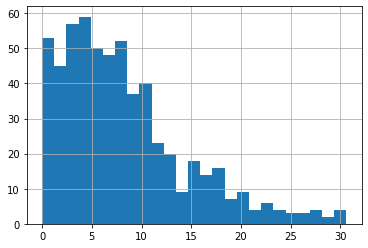

In [108]:
c["PTS"].hist(bins=25)

In [104]:
corr = c.corr()
corr

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,1.000000,-0.079444,-0.058846,-0.092124,-0.069602,-0.085924,-0.076987,-0.029852,-0.034322,-0.032094,...,-0.015947,-0.049206,-0.097932,-0.090442,-0.022153,-0.026771,-0.021443,-0.045585,-0.015929,-0.083665
Age,-0.079444,1.000000,0.083635,0.089968,0.149153,0.096710,0.087762,0.073121,0.126532,0.108245,...,0.094982,0.013094,0.128075,0.102826,0.159334,0.084117,0.028462,0.090890,0.119219,0.101296
G,-0.058846,0.083635,1.000000,0.656116,0.667190,0.583825,0.553896,0.301677,0.501430,0.468817,...,0.193749,0.339128,0.550413,0.526782,0.418179,0.454512,0.335738,0.444080,0.538134,0.583767
GS,-0.092124,0.089968,0.656116,1.000000,0.786010,0.758449,0.728965,0.220527,0.540417,0.526673,...,0.164665,0.393018,0.687426,0.647022,0.590982,0.547876,0.417099,0.648179,0.592348,0.754812
MP,-0.069602,0.149153,0.667190,0.786010,1.000000,0.885361,0.895088,0.225432,0.709412,0.722716,...,0.294865,0.374978,0.757745,0.694574,0.726063,0.706857,0.442652,0.774114,0.749441,0.882633
FG,-0.085924,0.096710,0.583825,0.758449,0.885361,1.000000,0.972748,0.294360,0.678892,0.682259,...,0.268987,0.371811,0.766543,0.699516,0.729876,0.615459,0.431141,0.830871,0.645158,0.992135
FGA,-0.076987,0.087762,0.553896,0.728965,0.895088,0.972748,1.000000,0.138613,0.764728,0.792970,...,0.314037,0.246890,0.697189,0.607672,0.765082,0.637276,0.330533,0.845401,0.612848,0.978544
FG%,-0.029852,0.073121,0.301677,0.220527,0.225432,0.294360,0.138613,1.000000,-0.026316,-0.099941,...,-0.037260,0.437941,0.334206,0.392096,0.052302,0.110113,0.397145,0.124980,0.318222,0.252588
3P,-0.034322,0.126532,0.501430,0.540417,0.709412,0.678892,0.764728,-0.026316,1.000000,0.974346,...,0.374369,-0.115731,0.360013,0.237977,0.554806,0.495700,0.041705,0.549556,0.364881,0.726905
3PA,-0.032094,0.108245,0.468817,0.526673,0.722716,0.682259,0.792970,-0.099941,0.974346,1.000000,...,0.381158,-0.130512,0.364944,0.237014,0.576436,0.514209,0.037277,0.580478,0.375026,0.729337


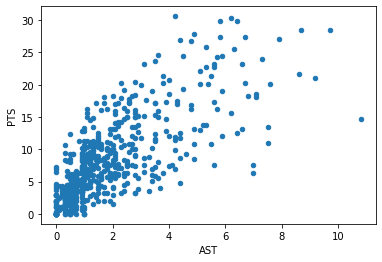

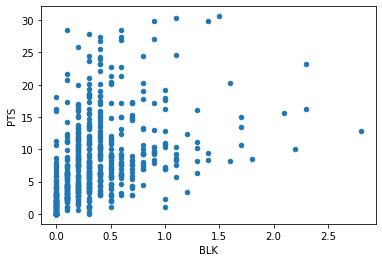

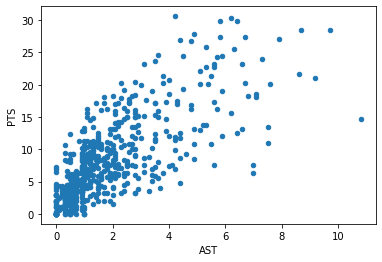

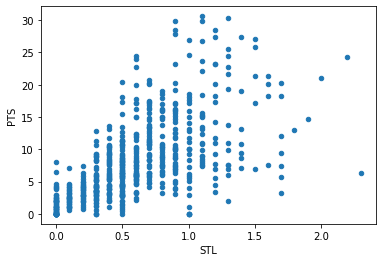

In [87]:
scatter = c.plot.scatter(x = "AST", y = "PTS")
plt.show(scatter)
scatter = c.plot.scatter(x = "BLK", y = "PTS")
plt.show(scatter)
scatter = c.plot.scatter(x = "AST", y = "PTS")
plt.show(scatter)
scatter = c.plot.scatter(x = "STL", y = "PTS")
plt.show(scatter)

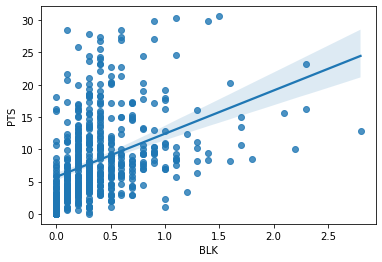

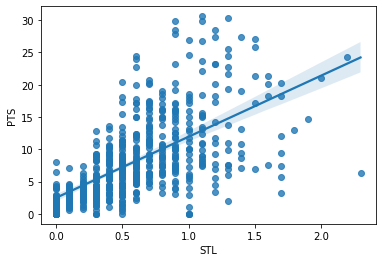

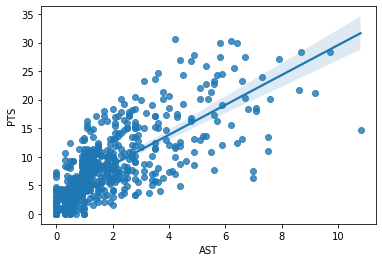

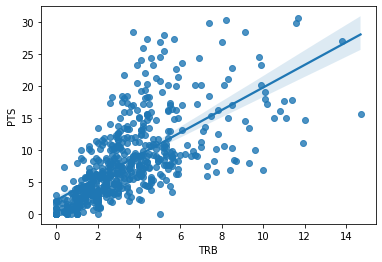

In [91]:
model = LinearRegression().fit(c[["Age"]], c[["PTS"]])
sns.regplot(x = c["BLK"], y = c["PTS"])
plt.show()
sns.regplot(x = c["STL"], y = c["PTS"])
plt.show()
sns.regplot(x = c["AST"], y = c["PTS"])
plt.show()
sns.regplot(x = c["TRB"], y = c["PTS"])
plt.show()

In [97]:
model = LinearRegression().fit(c[["BLK"]], c[["PTS"]])
b0_blk = model.intercept_
b1_blk = model.coef_
print(b0_blk)
print(b1_blk)

[5.72203842]
[[6.69199745]]
